<a href="https://colab.research.google.com/github/FoxFortino/DSPS_WFortino/blob/main/Labs/Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import scipy as sp
import astropy as ap
import matplotlib.pyplot as plt
import matplotlib.pyplot as pl
import scipy.stats
import scipy.optimize
import scipy.spatial
import astropy.time
import astropy.units as u
import astropy.constants as c
# import emcee
# import corner
import sklearn
import sklearn.preprocessing
import sklearn.manifold
import sklearn.cluster

# For running on Colaboratory
# ! pip install corner
# ! pip install emcee

# custom_mplstyle = ("https://raw.githubusercontent.com/FoxFortino"
#                    "/DSPS_WFortino/main/custom.mplstyle")
# plt.style.use(custom_mplstyle)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/Kaggle

[Errno 2] No such file or directory: '/content/drive/MyDrive/Kaggle'
/content


In [ ]:
cd /content/drive/MyDrive


/content/drive/MyDrive


In [ ]:
import json
envs = json.load(open(".kaggle/kaggle.json", "r"))

In [ ]:
import os

In [ ]:
os.environ["KAGGLE_USERNAME"] = envs["username"]
os.environ["KAGGLE_KEY"] = envs["key"]

In [ ]:
!pip install kaggle

In [ ]:
!kaggle

usage: kaggle [-h] [-v] {competitions,c,datasets,d,kernels,k,config} ...
kaggle: error: too few arguments


In [ ]:
!kaggle competitions download -c titanic

  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 400kB/s]
  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 7.91MB/s]
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 3.55MB/s]


In [ ]:
!kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              237KB  2021-11-10 18:11:20          15609  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           9472  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           4263  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-10-22 10:48:21           3463  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Jo

In [ ]:
ls

'Colab Notebooks'/
 emma.pdf
 fortino_portrait.jpg
 gender_submission.csv
'lecture11_annotedbywillow (1).pdf'
 lecture11_annotedbywillow.pdf
 ml_primer.pdf
'NSF GRFP 2020'/
'PHYS 601'/
'PHYS Lab Development 2021 Fall'@
 Quiz4.pdf
 Roster.gsheet
'SCEN101F20 Final-semester GTA Evaluation.WFortino.pdf'
'SCEN101F20 ProjectDayOutlines.Sec010.docx'
 Taylor.pdf
'Tcrit (1).gif'
 Tcrit.gif
 Tcrit.gif_video.mpg
 test.csv
 Titanic/
 train.csv
'Untitled spreadsheet.gsheet'


In [ ]:
mkdir Titanic

mkdir: cannot create directory ‘Titanic’: File exists


In [ ]:
mv *csv Titanic

In [ ]:
ls Titanic

gender_submission.csv  test.csv  train.csv


In [ ]:
cd Titanic

/content/drive/My Drive/Titanic


In [ ]:
ls

gender_submission.csv  test.csv  train.csv


In [ ]:
titanic = pd.read_csv("train.csv")

In [ ]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
titanic.shape

(891, 12)

In [ ]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
titanic = titanic[["Age", "Sex", "Pclass", "Survived"]]

In [ ]:
titanic.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
titanic

,Age,Sex,Pclass,Survived
0,22.0,male,3,0
1,38.0,female,1,1
2,26.0,female,3,1
3,35.0,female,1,1
4,35.0,male,3,0
...,...,...,...,...
885,39.0,female,3,0
886,27.0,male,2,0
887,19.0,female,1,1
889,26.0,male,1,1


In [ ]:
titanic["Gender"] = titanic.Sex.map({"male": 0, "female": 1})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
titanic

,Age,Sex,Pclass,Survived,Gender
0,22.0,male,3,0,0
1,38.0,female,1,1,1
2,26.0,female,3,1,1
3,35.0,female,1,1,1
4,35.0,male,3,0,0
...,...,...,...,...,...
885,39.0,female,3,0,1
886,27.0,male,2,0,0
887,19.0,female,1,1,1
889,26.0,male,1,1,0


In [ ]:
# purity by hand? dont worry about this, we do it with sklearn
(((titanic.Gender == 0) & (titanic.Survived == 1)).sum()) / (titanic.Gender == 0).sum()

0.2052980132450331

In [ ]:
from sklearn import tree

In [ ]:
dtc = tree.DecisionTreeClassifier(max_depth=3)
tree1 = dtc.fit(titanic[["Age", "Gender", "Pclass"]], titanic["Survived"])

In [ ]:
tree1.score(titanic[["Age", "Gender", "Pclass"]], titanic["Survived"])

0.8081232492997199

In [ ]:
from sklearn.model_selection import train_test_split as tts

In [ ]:
X_train, X_test, y_train, y_test = tts(titanic[["Age", "Gender", "Pclass"]], titanic["Survived"], train_size=0.8)

In [ ]:
dtc2 = tree.DecisionTreeClassifier(max_depth=2)
tree2 = dtc2.fit(X_train, y_train)

In [ ]:
tree2.score(X_train, y_train)

0.7985989492119089

In [ ]:
tree2.score(X_test, y_test)

0.8041958041958042

In [ ]:
import graphviz

In [ ]:
dot_data = tree.export_graphviz(dtc2, feature_names=["Age", "Gender", "Pclass"], 
                                out_file=None) 
graph = graphviz.Source(dot_data) 

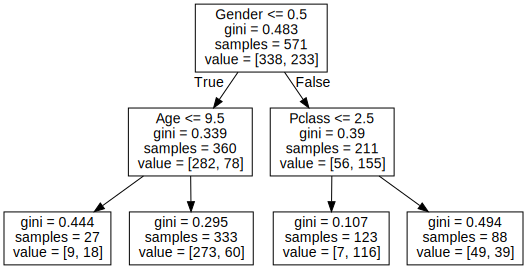

In [ ]:
graph

In [ ]:
# graph.render("TitanicTree")

In [ ]:
from sklearn import ensemble
rfc =  ensemble.RandomForestClassifier(max_depth=3, criterion="gini", random_state=222)
rf = rfc.fit(titanic[["Age", "Gender", "Pclass"]], titanic["Survived"])
print ("score %.2f"%rf.score(titanic[["Age", "Gender", "Pclass"]], titanic["Survived"]))

score 0.82


In [ ]:
rfc =  ensemble.RandomForestClassifier(max_depth=4, criterion="gini", random_state=222)
rf = rfc.fit(titanic[["Age", "Gender", "Pclass"]], titanic["Survived"])
print ("score %.2f"%rf.score(titanic[["Age", "Gender", "Pclass"]], titanic["Survived"]))

score 0.82


In [ ]:
rfc =  ensemble.RandomForestClassifier(max_depth=None, criterion="gini", random_state=222)
rf = rfc.fit(titanic[["Age", "Gender", "Pclass"]], titanic["Survived"])
print ("score %.2f"%rf.score(titanic[["Age", "Gender", "Pclass"]], titanic["Survived"]))

score 0.90


In [ ]:
gbtc =  ensemble.GradientBoostingClassifier(max_depth=4, random_state=222)
gbt = gbtc.fit(titanic[["Age", "Gender", "Pclass"]], titanic["Survived"])
print ("score %.2f"%gbt.score(titanic[["Age", "Gender", "Pclass"]], titanic["Survived"]))

score 0.89


In [ ]:
print("Random Forest feature importance")
for f,fi in zip (["Age", "Gender", "Pclass"], rf.feature_importances_):
  print (f, fi.round(2))

Random Forest feature importance
Age 0.45
Gender 0.35
Pclass 0.2


In [ ]:
print("Gradient Boosted Tree feature importance")
for f,fi in zip (["Age", "Gender", "Pclass"], gbt.feature_importances_):
  print (f, fi.round(2))

Gradient Boosted Tree feature importance
Age 0.3
Gender 0.47
Pclass 0.23
